<a href="https://colab.research.google.com/github/Dexne/Pattern_Recognition/blob/main/06_Regulaci%C3%B3n_Lp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reconocimiento de patrones**

**Regulación Lp**

Los métodos de regularización son técnicas en ML que nos permiten mitigar el problema de sobreentrenamiento. Existen muchas técnicas con efecto regulatorio en está practica nos centraremos en regulación L1 y L2, en el caso de ser usadas en el modelo lineal reciben los nombres de Lasso y Ridge

Primeramente importemos toda la paquetería que usaremos

In [10]:
# Páquetes básicos
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

# Páquetes de sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

Al igual que la práctica anterior vamos a crear datos sintéticos para este experimento.

In [11]:
# Semilla del generador pseudoaleatorio
np.random.seed(42)

# Número de muestras
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

# Particionar dataset
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

# Creamos una serie de datos de -3 a 3 interpolados linealmente
x_new=np.linspace(-3, 3, 200).reshape(-1, 1)

**Ridge (Regulación L2 del modelo lineal)**

La regulación Ridge es un método para regulación lineal múltiple para escenarios donde las variables independietes están altamente correlacionadas.

donde **beta**
 son los parámetros del modelo lineal y **alpha**
 es una constante de regulación. Notese que cuando **alpha = 0**
 el método termina siendo el mismo que el de regresión lineal. Experimente con el siguiente código para ver las diferencias de predicción según el coheficiente **alpha**
.

Train:  0.8548188344579787
Test:  0.8141737177676354


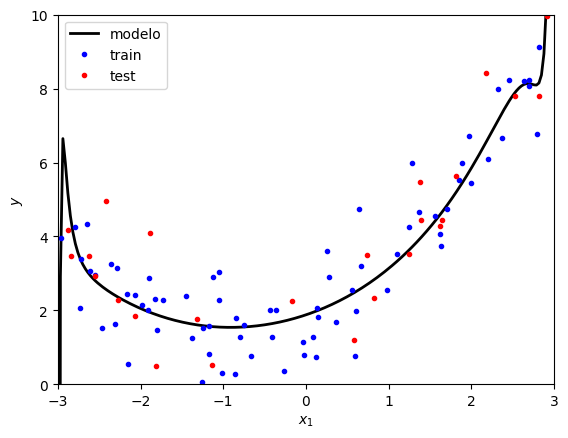

In [24]:
# Constante de regulación
alpha = 2.7

# Instanciamos el modelo
model = Pipeline([ ("poly_features", PolynomialFeatures(degree=300, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("lasso", Ridge(alpha))])

# Entrenamos el modelo
model.fit(xtrain, ytrain)

# Calculamos el desempeño del modelo (r2_score)
print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))


# Dibujar salida
y_new = model.predict(x_new)
plt.plot(x_new, y_new, 'k-', label='modelo', linewidth=2)
plt.plot(xtrain, ytrain, "b.", label='train', linewidth=3)
plt.plot(xtest, ytest, "r.",label='test', linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.axis([-3, 3, 0, 10])
plt.show()

**LASSO (Regulación L1 del modelo lineal)**

La regulación Lasso viene del acrónimo en inglés de "least absolute shrinkage and selection operator" se usa como regulador y selector de variables.

Train:  0.8569846319754176
Test:  0.822550732803516


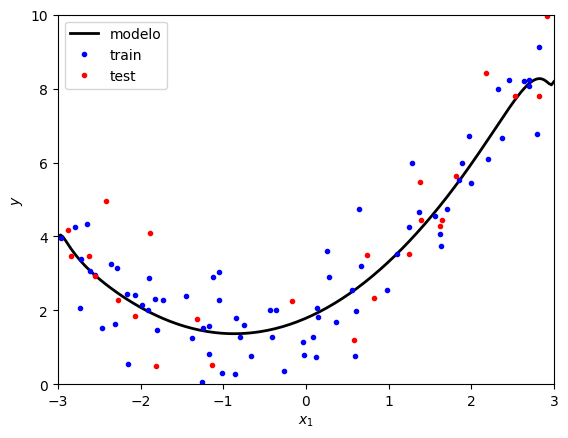

In [28]:
# Constante de regulación
alpha = 0.01

# Instanciamos el modelo
model = Pipeline([ ("poly_features", PolynomialFeatures(degree=300, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("lasso", Lasso(alpha))])

# Entrenamos el modelo
model.fit(xtrain, ytrain)

# Calculamos el desempeño del modelo (r2_score)
print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))


# Dibujar salida
y_new = model.predict(x_new)
plt.plot(x_new, y_new, 'k-', label='modelo', linewidth=2)
plt.plot(xtrain, ytrain, "b.", label='train', linewidth=3)
plt.plot(xtest, ytest, "r.",label='test', linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.axis([-3, 3, 0, 10])
plt.show()

**ElasticNet (Regulación L1 y L2 del modelo lineal)**

El método ElasticNet es la combinación de los dos anteriores.

Experimente con el siguiente código para ver las diferencias de predicción según el coheficiente alpha
 y la razón lambda
.

Train:  0.8433644411654281
Test:  0.8142539725239045


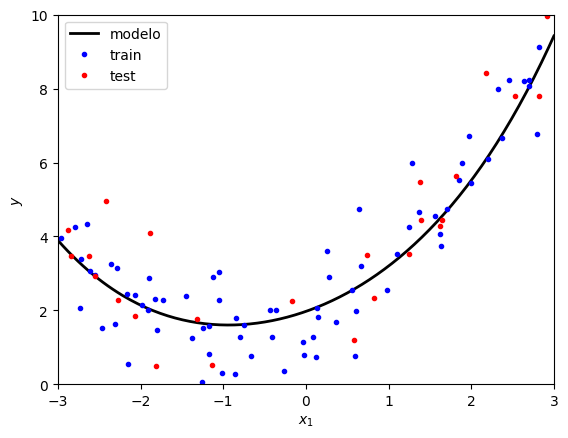

In [30]:
# Constante de regulación
alpha = 0.1
l1_ratio = 0.5

# Instanciamos el modelo
model = Pipeline([ ("poly_features", PolynomialFeatures(degree=300, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("lasso", ElasticNet(alpha=alpha, l1_ratio=l1_ratio))])

# Entrenamos el modelo
model.fit(xtrain, ytrain)

# Calculamos el desempeño del modelo (r2_score)
print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))


# Dibujar salida
y_new = model.predict(x_new)
plt.plot(x_new, y_new, 'k-', label='modelo', linewidth=2)
plt.plot(xtrain, ytrain, "b.", label='train', linewidth=3)
plt.plot(xtest, ytest, "r.",label='test', linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.axis([-3, 3, 0, 10])
plt.show()